In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Return the unique elements of a tratining output set and take it length as Classes
Ntr = x_train.shape[0] # number of training examples
Nte = x_test.shape[0] # number of testing examples
Din = 3072 # By CIFAR10 data set with 32 x 32 x 3 color images

x_train = x_train[range(Ntr), :]
x_test = x_test[range(Nte), :]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]


y_train = tf.keras.utils.to_categorical(y_train, num_classes=K) # This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32') # reshape the data set
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

H = 200 # No of hidden nodes
std=1e-6 # standard deviation (sigma)
w1 = std*np.random.randn(Din, H) #Return a sample (or samples) from the “standard normal” distribution.
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H) # creating array of zeros
b2 = np.zeros(K)
print("w1:", w1.shape)
print("w2:", w2.shape)
print("b1:", b1.shape)
print("b2:", b2.shape)

x_train: (50000, 32, 32, 3)
w1: (3072, 200)
w2: (200, 10)
b1: (200,)
b2: (10,)


In [3]:
batch_size = Ntr # for gradient descent optimization batch size is equal to number of training set

iterations = 300 # epochs
lr = 1.4e-2 # the learning rate alpha
lr_decay = 0.999
reg = 5e-6 # the regularization constant
loss_history_test = []
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history = []

In [4]:
for t in range(iterations):
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]
    #forward
    #----------------------------------------------for train set---------------------------------------------------------------------
    h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1 ))) # create a activation function (sigmoid function)
    y_pred = h.dot(w2) + b2 # create predictable output
    #----------------------------------------------for test set----------------------------------------------------------------------
    h_t = 1.0/(1.0 + np.exp(-(x_test.dot(w1) + b1 ))) # create a activation function for test data (sigmoid function)
    y_pred_test = h_t.dot(w2) + b2 # create predictable output
    #--------------------------------------------------------------------------------------------------------------------------------
    loss_test = (1./Nte)*np.square(y_pred_test - y_test).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1))
    loss_history_test.append(loss_test)
    loss = (1./batch_size)*np.square(y_pred - y).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1)) # loss function with regularization term 
    loss_history.append(loss)
    
    # compute the accuracy as percentage
    training_acc = 100*(1 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum())  
    testing_acc = 100*(1 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum())
    train_acc_history.append(training_acc)
    val_acc_history.append(testing_acc)
    
    if t % 10 == 0:
        print("iteration %d / %d| training loss %f| testing loss %f training accuracy %f| testing accuracy %f" % (t, iterations, loss, loss_test, training_acc, testing_acc))
    
    #backward
    dy_pred = 1./batch_size*2.0*(y_pred - y) # partial derivatives w.r.t y_predicted
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)

    # updating learning parameters
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay
    
    lr_history.append(lr)

iteration 0 / 300| training loss 0.999997| testing loss 0.999997 training accuracy 73.068000| testing accuracy 73.000000
iteration 10 / 300| training loss 1.009744| testing loss 1.011068 training accuracy 62.796600| testing accuracy 63.000000
iteration 20 / 300| training loss 0.853657| testing loss 0.853563 training accuracy 72.542600| testing accuracy 72.778000
iteration 30 / 300| training loss 0.845813| testing loss 0.845545 training accuracy 70.881200| testing accuracy 70.998000
iteration 40 / 300| training loss 0.835476| testing loss 0.835474 training accuracy 73.289400| testing accuracy 73.394000
iteration 50 / 300| training loss 0.825094| testing loss 0.825370 training accuracy 73.846600| testing accuracy 74.233000
iteration 60 / 300| training loss 0.818740| testing loss 0.820045 training accuracy 75.281200| testing accuracy 74.988000
iteration 70 / 300| training loss 0.810288| testing loss 0.810795 training accuracy 75.510000| testing accuracy 75.435000
iteration 80 / 300| train

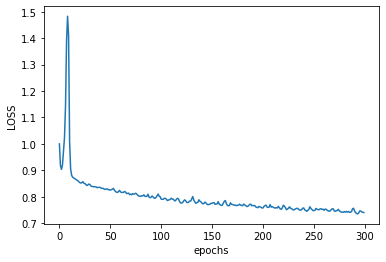

In [5]:
fig, axes = plt.subplots()
axes.plot(loss_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("LOSS")
plt.show()
fig.savefig('LOSS.png',transparent=True)

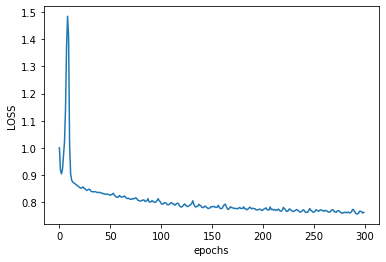

In [6]:
fig, axes = plt.subplots()
axes.plot(loss_history_test)  
axes.set_xlabel("epochs")
axes.set_ylabel("LOSS")
plt.show()
fig.savefig('testing_loss.png',transparent=True)

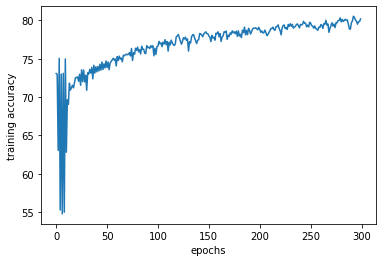

In [7]:
fig, axes = plt.subplots() 
axes.plot(train_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("training accuracy")
plt.show()
fig.savefig('training_accuracy.png',transparent=True)

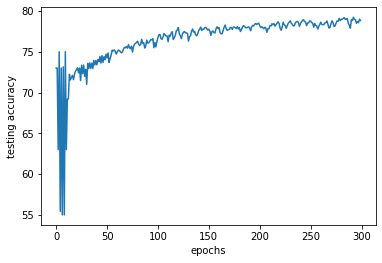

In [8]:
fig, axes = plt.subplots() 
axes.plot(val_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("testing accuracy")
plt.show()
fig.savefig('testing_accuracy.png',transparent=True)

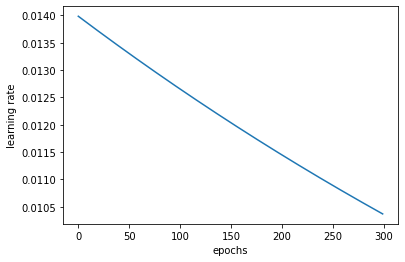

In [9]:
fig, axes = plt.subplots() 
axes.plot(lr_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("learning rate")
plt.show()
fig.savefig('learning rate.png',transparent=True)